Based on: https://abndistro.com/post/2019/06/25/example-gradient-boosted-classifier-using-scikit-learn/

# The Data We Will Use

In [37]:
import pandas as pd

breast_cancer = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

breast_cancer.columns = ['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                         'X8', 'X9', 'malignant']

In [38]:
breast_cancer = breast_cancer.drop(columns = ["ID", "X6"])

breast_cancer = breast_cancer.dropna()

X = breast_cancer.drop(columns = "malignant")

y = breast_cancer[["malignant"]]

# Encode Labels

In [54]:
from sklearn import preprocessing

label_enc = preprocessing.LabelEncoder()

label_enc.fit(y.values.ravel())

y_enc = label_enc.transform(y.values.ravel())

pd.value_counts(y_enc)

0    457
1    241
dtype: int64

# Splitting the Data Set Into Training Data and Test Data

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y_enc, test_size=0.33, random_state=42)

# Scaling the Train and Test Data Set

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Training the Gradient Boost Classifier with Different Learning Rates

In [42]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

for learning_rate in learning_rates:

    gb = GradientBoostingClassifier(
      n_estimators=20, 
      learning_rate = learning_rate, 
      max_features=2, 
      max_depth = 2, 
      random_state = 0)
      
    gb.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy (training): 0.964
Accuracy (validation): 0.965

Learning rate:  0.1
Accuracy (training): 0.970
Accuracy (validation): 0.965

Learning rate:  0.25
Accuracy (training): 0.970
Accuracy (validation): 0.965

Learning rate:  0.5
Accuracy (training): 0.985
Accuracy (validation): 0.961

Learning rate:  0.75
Accuracy (training): 0.989
Accuracy (validation): 0.952

Learning rate:  1
Accuracy (training): 0.983
Accuracy (validation): 0.944



# Selecting the Best Learning Rate

In [44]:
gb = GradientBoostingClassifier(
      n_estimators=20, 
      learning_rate = 0.5, 
      max_features=2, 
      max_depth = 2, 
      random_state = 0)
      
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

# Making Predictions With our Gradient Boosting Model

In [45]:
predictions = gb.predict(X_test)

# Assessing the Performance of Our Gradient Boosting Model

## Using the Classification Report

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       149
           1       0.93      0.96      0.95        82

    accuracy                           0.96       231
   macro avg       0.95      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231



## Using the Confusion Matrix

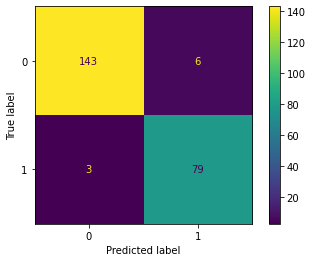

In [47]:
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

plot_confusion_matrix(gb, X_test, y_test)

plt.show()

## Using the ROC and AUC
https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/  
ROC = Receiver Operator Characteristic  
AUC = Area Under Curve

In [48]:
from sklearn.metrics import roc_curve, auc

y_scores_gb = gb.decision_function(X_test)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)

roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.99


### Visualising the ROC Curve and AUC
Code to visualise ROC found at https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

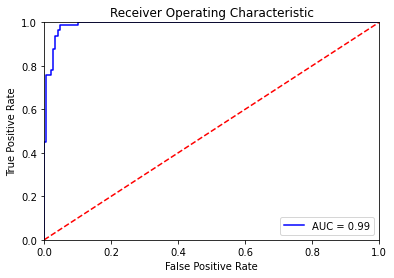

In [49]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')

plt.plot(fpr_gb, tpr_gb, 'b', label = 'AUC = %0.2f' % roc_auc_gb)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

# Saving the Gradient Boosting Model

In [51]:
import pickle

saved_model = pickle.dumps(gb)

loaded_model = pickle.loads(saved_model)